#### **Exercise 1**

Remove the outliers from the `sample_data_with_outliers.csv`!  Plot boxplots of the two features before and after outlier removal.

In [57]:

import pandas as pd
data = pd.read_csv('~/Downloads/sample_data_with_outliers.csv')
data.head()
AGE = 'Age'
INCOME = 'Income'
TARGET = 'Purchase'


array([[<Axes: title={'center': 'Income'}>]], dtype=object)

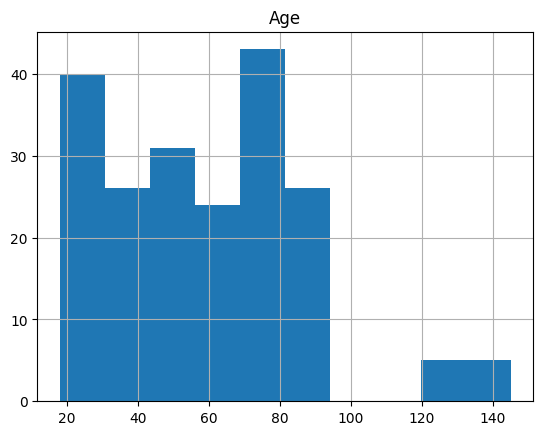

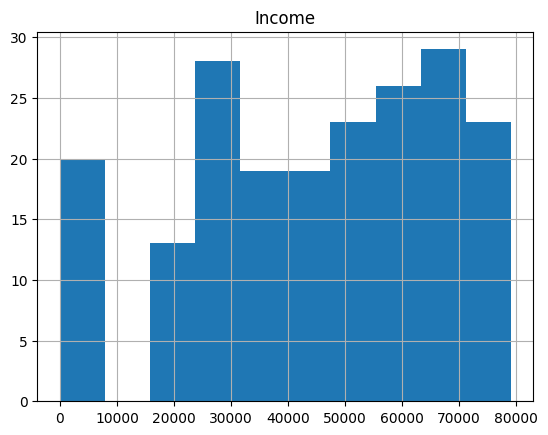

In [60]:
data[[AGE]].hist(bins=10)

data[[INCOME]].hist(bins=10)


orignal: (200, 3)
Z Scores: 0      0.600017
1      1.020468
2      0.810243
3      0.775205
4      0.109492
         ...   
195    0.074455
196    0.179567
197   -0.451108
198   -1.046746
199    0.179567
Name: Z_Score_Age, Length: 200, dtype: float64
outliers_z_score:      Age  Income  Purchase  Z_Score_Age
67   127      70         0     2.386931
73   126      33         0     2.351893
77   122      84         0     2.211743
108  120      20         0     2.141668
122  128      46         0     2.421968
139  139      28         0     2.807381
150  138      68         0     2.772343
157  145      16         0     3.017606
161  138      26         1     2.772343
193  139      31         0     2.807381
outliers_iqr 
: (0, 6)
length outliers_z: (10, 6)


/var/folders/_q/vf9xhlxd4v338mp15mv_g_lw0000gp/T/ipykernel_26774/556482460.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputed[feature_name].where(~df.index.isin(outliers_z_score.index), df[feature_name].median(), inplace=True)
/var/folders/_q/vf9xhlxd4v338mp15mv_g_lw0000gp/T/ipykernel_26774/556482460.py:37: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '58.5' has dtype incompatible with int64, please explicitly cast to a compatible d

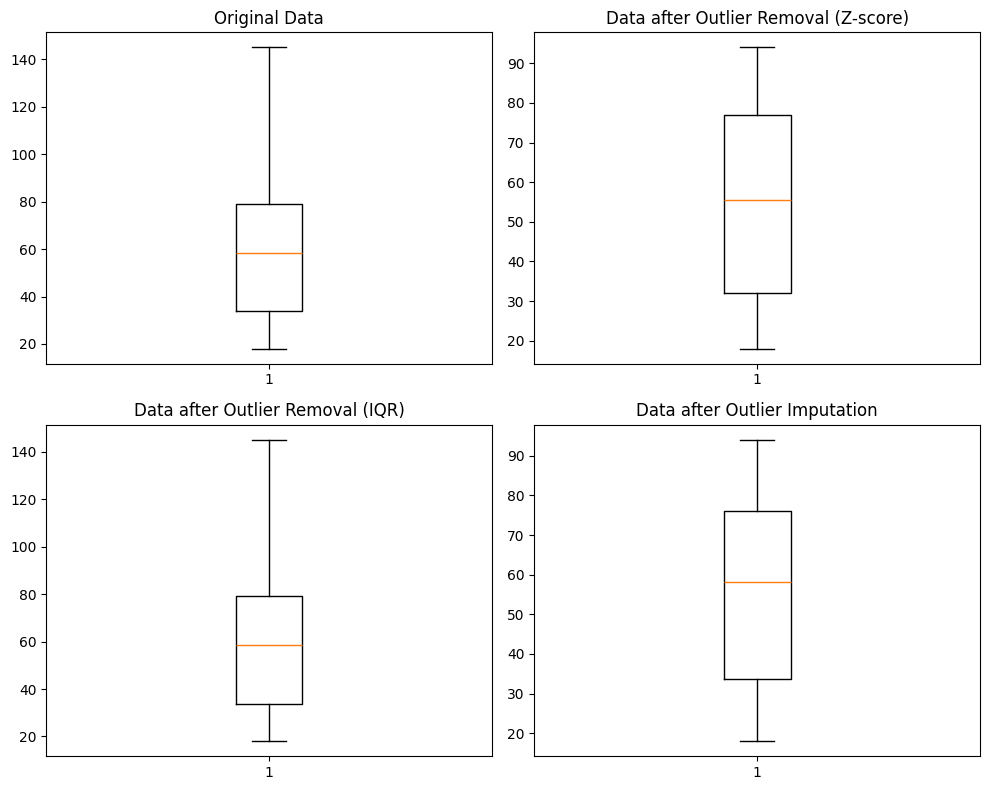

orignal: (200, 3)
Z Scores: 0      1.349827
1      0.786128
2      0.764277
3      0.983641
4     -0.634154
         ...   
195    0.713096
196    0.227593
197   -0.890369
198    0.717547
199    1.050888
Name: Z_Score_Income, Length: 200, dtype: float64
outliers_z_score: Empty DataFrame
Columns: [Age, Income, Purchase, Z_Score_Income]
Index: []
outliers_iqr 
: (0, 6)
length outliers_z: (0, 6)


/var/folders/_q/vf9xhlxd4v338mp15mv_g_lw0000gp/T/ipykernel_26774/556482460.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputed[feature_name].where(~df.index.isin(outliers_z_score.index), df[feature_name].median(), inplace=True)


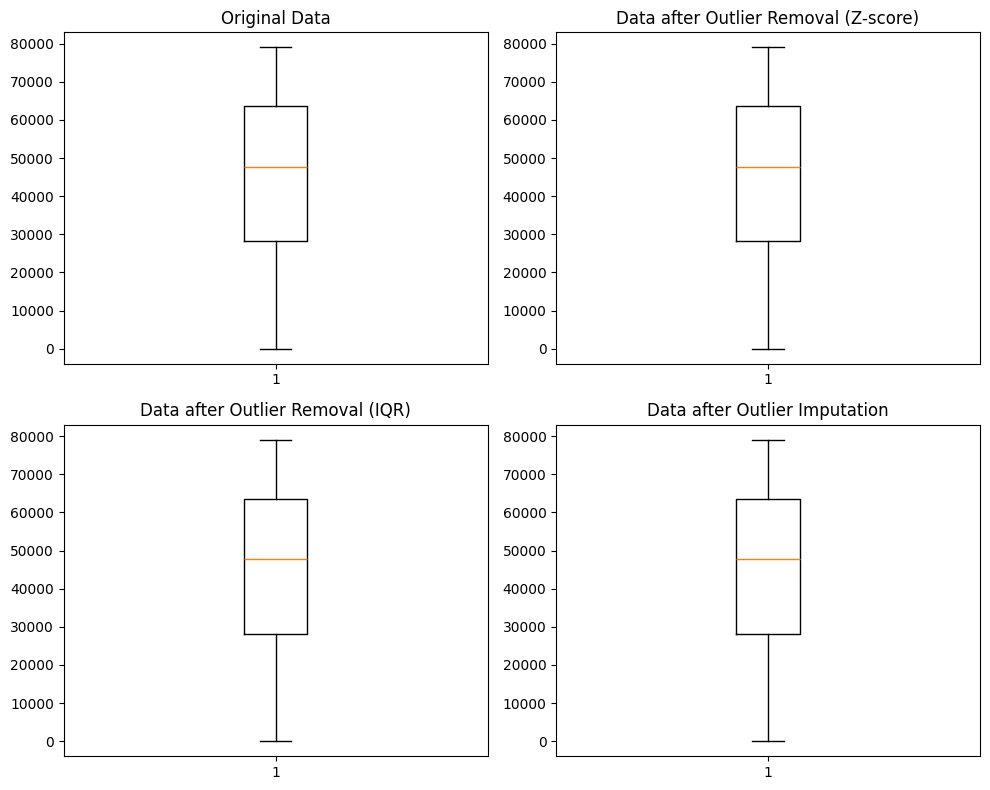

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

def demoOutliers(df, feature_name):
    print(f'orignal: {df.shape}')
    Z_SCORE = 'Z_Score_' + feature_name 
    # Detecting outliers using Z-score
    df[Z_SCORE] = zscore(df[feature_name])
    print(f'Z Scores: {df[Z_SCORE]}')
    outliers_z_score = df[np.abs(df[Z_SCORE]) > 2]
    print(f'outliers_z_score: {outliers_z_score}')

    # Detecting outliers using IQR method
    Q1 = df[feature_name].quantile(0.25)
    Q3 = df[feature_name].quantile(0.75)
    IQR = Q3 - Q1

    df['MIN_IQR'] = Q1 - 1.5 * IQR
    df['MAX_IQR'] = Q3 + 1.5 * IQR

    outliers_iqr = df[(df[feature_name] < (Q1 - 1.5 * IQR)) | (df[feature_name] > (Q3 + 1.5 * IQR))]
    outliers_z = df[np.abs(df[Z_SCORE]) > 2]
    print(f'outliers_iqr \n: {outliers_iqr.shape}')   
    print(f'length outliers_z: {outliers_z.shape}')   

    df.to_csv(f'{feature_name}_with_scores.csv')


    # Handling outliers: Removal
    df_no_outliers_z = df[np.abs(df[Z_SCORE]) <= 2]
    df_no_outliers_iqr = df[(df[feature_name] >= (Q1 - 1.5 * IQR)) & (df[feature_name] <= (Q3 + 1.5 * IQR))]

    # Handling outliers: Imputation (Replace with Median)
    df_imputed = df.copy()
    df_imputed[feature_name].where(~df.index.isin(outliers_z_score.index), df[feature_name].median(), inplace=True)

    # Create Subplots
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))
    axs[0, 0].boxplot(original_df[feature_name])
    axs[0, 0].set_title('Original Data')

    axs[0, 1].boxplot(df_no_outliers_z[feature_name])
    axs[0, 1].set_title('Data after Outlier Removal (Z-score)')

    axs[1, 0].boxplot(df_no_outliers_iqr[feature_name])
    axs[1, 0].set_title('Data after Outlier Removal (IQR)')

    axs[1, 1].boxplot(df_imputed[feature_name])
    axs[1, 1].set_title('Data after Outlier Imputation')

    plt.tight_layout()
    plt.show()


# Original DataFrame
demoOutliers(data.copy(), AGE)
demoOutliers(data.copy(), INCOME)

In [76]:
from sklearn.ensemble import IsolationForest
import numpy as np

rng = np.random.RandomState(0)

# Helper function to train and predict IF model for a feature
def train_and_predict_if(df, feature):
    clf = IsolationForest(max_samples=100, random_state=rng)
    clf.fit(df[[feature]])
    pred = clf.predict(df[[feature]])
    scores = clf.decision_function(df[[feature]])
    stats = pd.DataFrame()
    stats['val'] = df[feature]
    stats['score'] = scores
    stats['outlier'] = pred 
    stats['min'] = df[feature].min()
    stats['max'] = df[feature].max()
    stats['mean'] = df[feature].mean()
    stats['feature'] = [feature] * len(df)
    return stats

# Helper function to print outliers
def print_outliers(df, feature, n):
    print(feature)
    print(df[feature].head(n).to_string(), "\n")

result = pd.DataFrame()
for feature in [AGE, INCOME]:
    stats = train_and_predict_if(data, feature)
    result = pd.concat([result, stats])
    
# Gather top outliers for each feature
outliers = {team:grp.drop('feature', axis=1) 
       for team, grp in result.sort_values(by='score').groupby('feature')}

# Print the top 10 outlier samples for a few selected features
n_outliers = 20
print_outliers(outliers, AGE, n_outliers)
print_outliers(outliers, INCOME, n_outliers)


Age
     val     score  outlier  min  max    mean
157  145 -0.254154       -1   18  145  58.875
193  139 -0.205521       -1   18  145  58.875
139  139 -0.205521       -1   18  145  58.875
150  138 -0.202604       -1   18  145  58.875
161  138 -0.202604       -1   18  145  58.875
77   122 -0.190596       -1   18  145  58.875
122  128 -0.190036       -1   18  145  58.875
108  120 -0.187619       -1   18  145  58.875
73   126 -0.185477       -1   18  145  58.875
67   127 -0.183775       -1   18  145  58.875
15    18 -0.097560       -1   18  145  58.875
81    18 -0.097560       -1   18  145  58.875
176   18 -0.097560       -1   18  145  58.875
51    18 -0.097560       -1   18  145  58.875
172   94 -0.071166       -1   18  145  58.875
152   94 -0.071166       -1   18  145  58.875
44    93 -0.050291       -1   18  145  58.875
74    22 -0.039578       -1   18  145  58.875
163   22 -0.039578       -1   18  145  58.875
55    23 -0.037554       -1   18  145  58.875 

Income
       val     score 

/Users/pjmcswee/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but EllipticEnvelope was fitted with feature names
  warnings.warn(
/Users/pjmcswee/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but OneClassSVM was fitted with feature names
  warnings.warn(
/Users/pjmcswee/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Nystroem was fitted with feature names
  warnings.warn(
/Users/pjmcswee/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


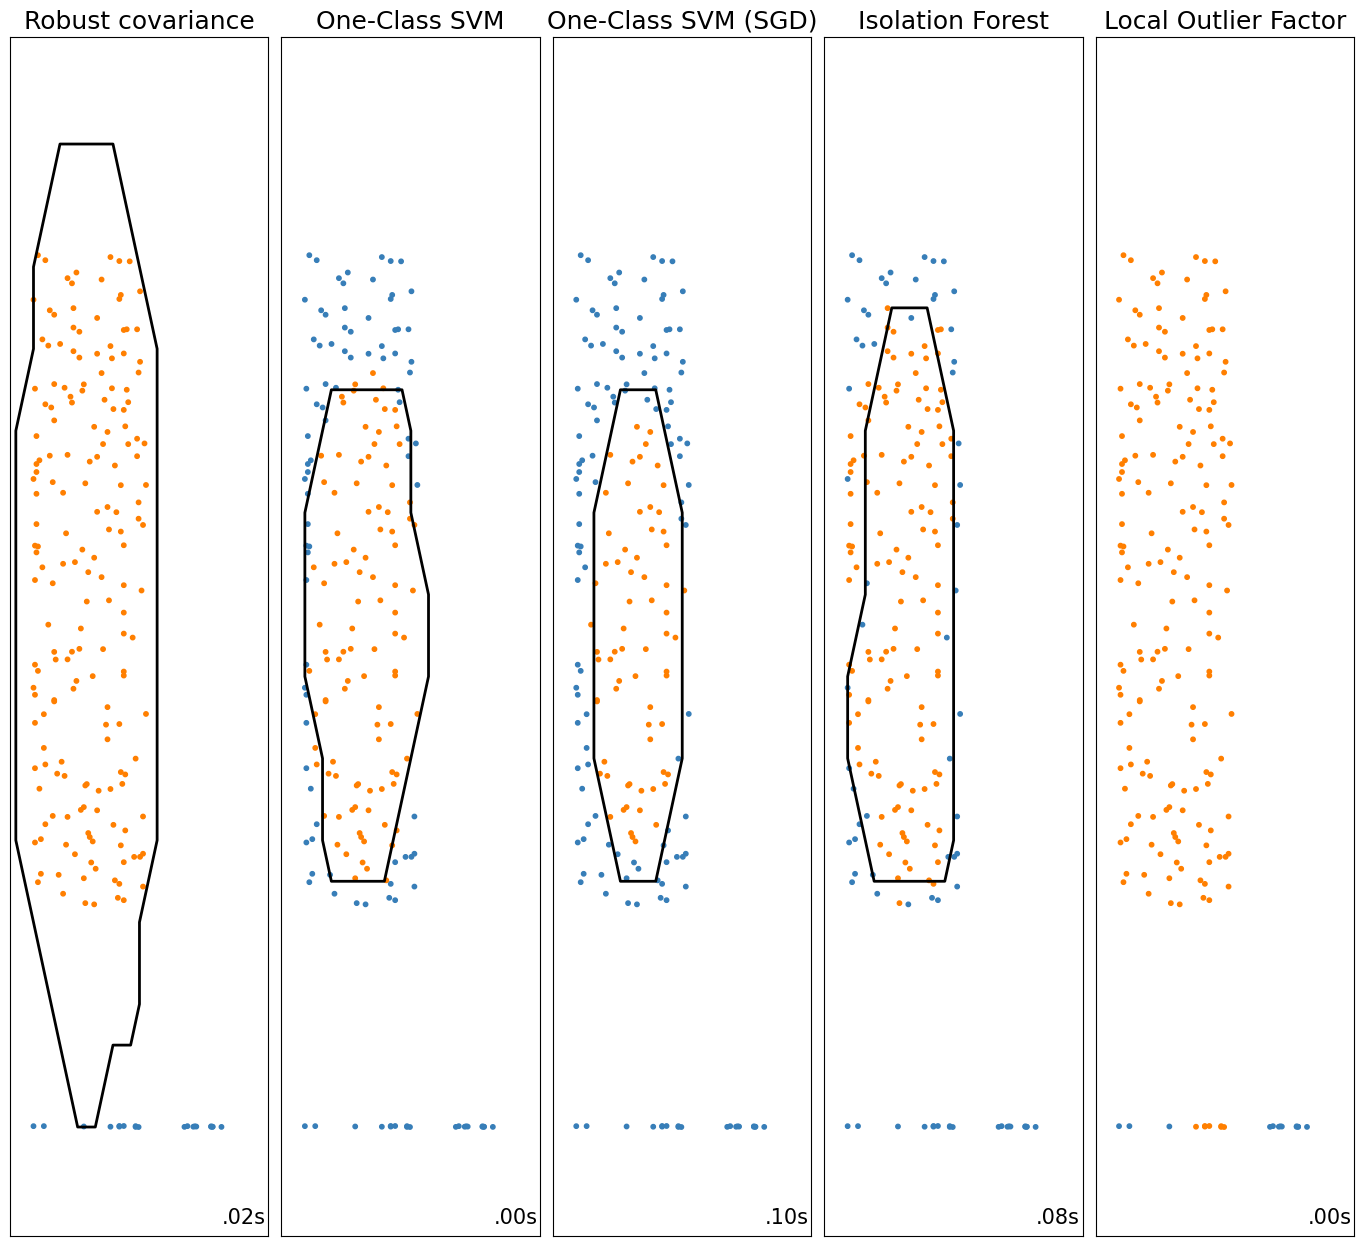

In [89]:
# Editted from 
# Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
#         Albert Thomas <albert.thomas@telecom-paristech.fr>
# License: BSD 3 clause

import time

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from sklearn import svm
from sklearn.covariance import EllipticEnvelope
from sklearn.datasets import make_blobs, make_moons
from sklearn.ensemble import IsolationForest
from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import SGDOneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

matplotlib.rcParams["contour.negative_linestyle"] = "solid"

# define outlier/anomaly detection methods to be compared.
# the SGDOneClassSVM must be used in a pipeline with a kernel approximation
# to give similar results to the OneClassSVM
anomaly_algorithms = [
    (
        "Robust covariance",
        EllipticEnvelope(random_state=42),
    ),
    ("One-Class SVM", svm.OneClassSVM(kernel="rbf", gamma=0.1)),
    (
        "One-Class SVM (SGD)",
        make_pipeline(
            Nystroem(gamma=0.1, random_state=42, n_components=150),
            SGDOneClassSVM(
                # nu=outliers_fraction,
                shuffle=True,
                fit_intercept=True,
                random_state=42,
                tol=1e-6,
            ),
        ),
    ),
    (
        "Isolation Forest",
         IsolationForest(random_state=42),
    ),
    (
        "Local Outlier Factor",
        LocalOutlierFactor(n_neighbors=35),
    ),
]

new_data = data.copy()
scaler = MinMaxScaler()
new_data[['NewAge', 'NewIncome']] = scaler.fit_transform(new_data[[AGE, INCOME]])

# Compare given classifiers under given settings
xx, yy = np.meshgrid(np.linspace(-7, 7, 150), np.linspace(-7, 7, 150))

plt.figure(figsize=(len(anomaly_algorithms) * 2 + 4, 12.5))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.96, wspace=0.05, hspace=0.01
)

plot_num = 1
rng = np.random.RandomState(42)

X = new_data[['NewAge', 'NewIncome']]
for name, algorithm in anomaly_algorithms:
    t0 = time.time()
    algorithm.fit(X)
    t1 = time.time()    
    plt.subplot(1, len(anomaly_algorithms), plot_num)
    plt.title(name, size=18)

    # fit the data and tag outliers
    if name == "Local Outlier Factor":
        y_pred = algorithm.fit_predict(X)
    else:
        y_pred = algorithm.fit(X).predict(X)

    # plot the levels lines and the points
    if name != "Local Outlier Factor":  # LOF does not implement predict
        Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="black")

    colors = np.array(["#377eb8", "#ff7f00"])
    plt.scatter(X['NewAge'], X['NewIncome'], s=10, color=colors[(y_pred + 1) // 2])

    plt.xlim(-0.125, 1.25)
    plt.ylim(-0.125, 1.25)
    plt.xticks(())
    plt.yticks(())
    plt.text(
        0.99,
        0.01,
        ("%.2fs" % (t1 - t0)).lstrip("0"),
        transform=plt.gca().transAxes,
        size=15,
        horizontalalignment="right",
    )
    plot_num += 1

plt.show()

#### **Exercise 2**

In the following, I've created a sample dataset with an exponential feature and a normal feature. Try using the different scaling methods before running the classifier.  How do your results change:

1.  If you scale the exponential feature using a StandardScaler
2.  If you scale the exponential feature using a Log transform

Original
Logistic Regression without Scaling - Test Accuracy: 0.72


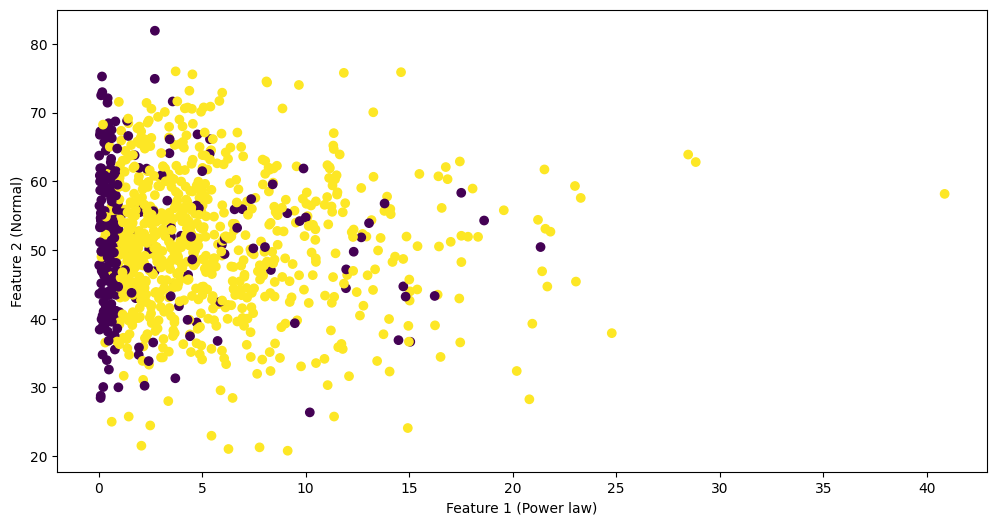

MinMax Scalar
[[0.05688498 0.50683993]
 [0.3679666  0.25938621]
 [0.16064331 0.53995764]
 ...
 [0.01744504 0.47172025]
 [0.36678749 0.4075665 ]
 [0.07174001 0.36453427]]
Logistic Regression without Scaling - Test Accuracy: 0.72


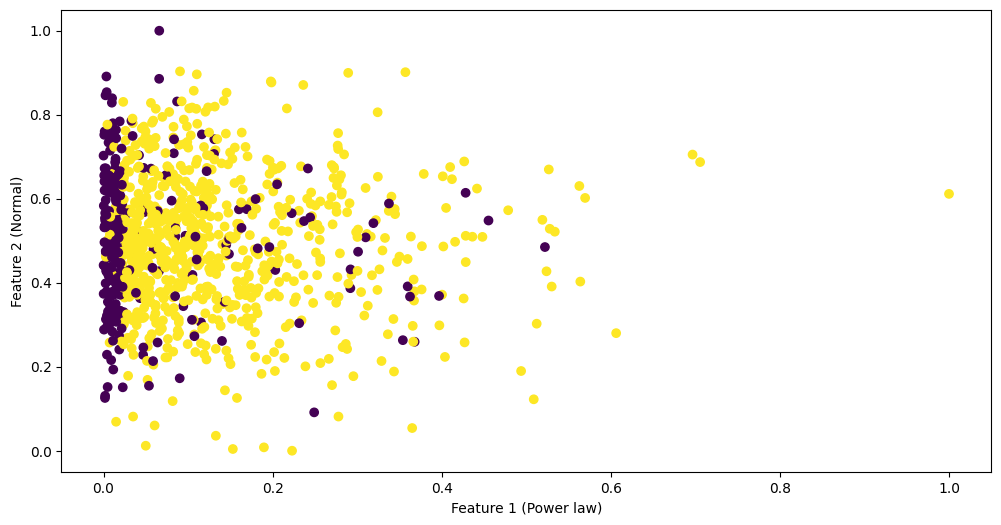

Standard Scalar
[[-0.5177219   0.07972695]
 [ 2.09626152 -1.45101619]
 [ 0.35414755  0.28459236]
 ...
 [-0.84913121 -0.13752259]
 [ 2.08635356 -0.53437626]
 [-0.39289681 -0.80057267]]
Logistic Regression without Scaling - Test Accuracy: 0.72


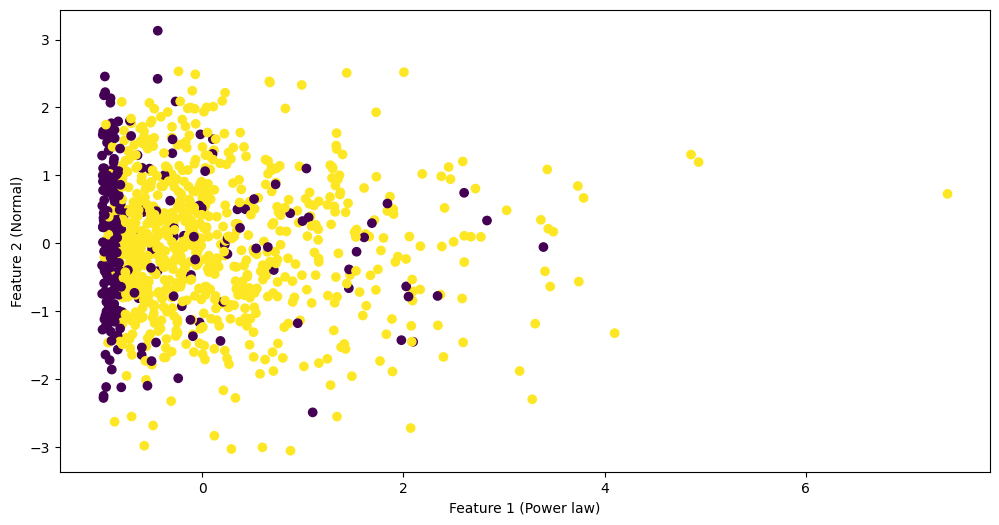

Log Normalized
[[ 0.85285686  3.94694623]
 [ 2.71141833  3.60131947]
 [ 1.88460122  3.98531024]
 ...
 [-0.30699777  3.90458808]
 [ 2.70821374  3.82225097]
 [ 1.08282332  3.76296113]]
Logistic Regression without Scaling - Test Accuracy: 0.91


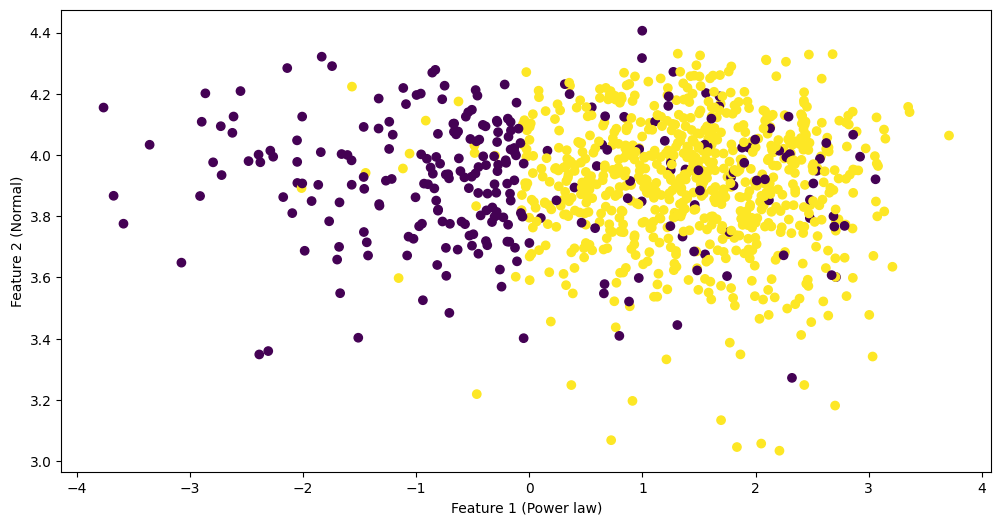

In [107]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer
import matplotlib.pyplot as plt



def runLogistic_regression(X, y):
    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Logistic Regression without scaling
    lr = LogisticRegression(max_iter=1000)
    lr.fit(X_train, y_train)
    print(f"Logistic Regression without Scaling - Test Accuracy: {lr.score(X_test, y_test):.2f}")

    # Plot original features
    plt.figure(figsize=(12, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
    plt.xlabel('Feature 1 (Power law)')
    plt.ylabel('Feature 2 (Normal)')
    plt.show()


# Set random seed for reproducibility
np.random.seed(42)

# Create synthetic dataset
n_samples = 1000

# Feature 1: Power law (exponential) distribution
X1 = np.random.exponential(scale=5, size=n_samples)

# Feature 2: Normal distribution
X2 = np.random.normal(loc=50, scale=10, size=n_samples)

# Create labels: simple linear relation to X1 and X2
y = np.array([1 if x1 + 0.001 * x2 > 1 else 0 for x1, x2 in zip(X1, X2)])
flip_indices = np.random.choice(n_samples, size=int(0.1 * n_samples), replace=False)
y[flip_indices] = 1 - y[flip_indices]


# Combine features into single data array
X = np.column_stack((X1, X2))


print('Original')
runLogistic_regression(X, y)


print('MinMax Scalar')
minMaxScaler = MinMaxScaler()
X_MinMax = minMaxScaler.fit_transform(X)
print(X_MinMax)
runLogistic_regression(X_MinMax, y)

print('Standard Scalar')
standardScaler = StandardScaler()
X_Standard = standardScaler.fit_transform(X)
print(X_Standard)
runLogistic_regression(X_Standard, y)


print('Log Normalized')
X_Log = np.log(X)
print(X_Log)
runLogistic_regression(X_Log, y)







#### **Exercise 3**

The **Titanic dataset** contains the passenger list for all 768 passengers on the Titanic, as well as who survived.  Note that some features may or may not be meaningful for machine learning purposes.

The following columns are available in the original dataset:

1. **PassengerId**: An unique identifier for each passenger.
2. **Survived**: Whether the passenger survived or not. 1 for survived, 0 for deceased.
3. **Pclass**: The ticket class, indicating the socio-economic status of the passenger (1st = Upper, 2nd = Middle, 3rd = Lower).
4. **Name**: The full name of the passenger, sometimes including titles.
5. **Sex**: Gender of the passenger, usually 'male' or 'female'.
6. **Age**: Age of the passenger in years, although it's fractional if the age is less than one.
7. **SibSp**: The number of siblings or spouses aboard.
8. **Parch**: The number of parents or children aboard.
9. **Ticket**: The ticket number.
10. **Fare**: The amount of money paid for the ticket.
11. **Cabin**: The cabin number where the passenger stayed. This field contains many missing values.
12. **Embarked**: Port of embarkation, where C = Cherbourg, Q = Queenstown, S = Southampton.

Load the titanic data set from the seaborn library. Note that some columns are redundant, or may be labeled somewhat differently than in the original, and several are missing data.  Your task:

1. Load the dataset and identify the columns that have nulls.  Which columns do you think you should try to fill in?  Why?
2. For those that seem like they might matter for machine learning, apply the following methods to fill in nulls:
    - Fill forward, using 'ffill' (see Monday's lecture)
    - Use a "mean" with a SimpleImputer
    - Use a "most_frequent" with a simple imputer
    - Try to use a KNN imputer (see the important note above!).  It won't work!  What does the error say?
3. Compare histograms for your imputation methods.  Which would you pick?  Why?

In [112]:
# Here's how we load data from seaborn
!pip3 install seaborn


import seaborn as sns

titanic_data = sns.load_dataset('titanic')
titanic_data.head()

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [146]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

print(titanic_data.isna().sum())

titanic_data['ffiled_age'] = titanic_data[['age']].ffill()
age_imputer_mf = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
age_imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
age_knn_imputer = KNNImputer()
titanic_data['age_mf'] = age_imputer_mf.fit_transform(titanic_data[['age']])
titanic_data['age_mean'] = age_imputer_mean.fit_transform(titanic_data[['age']])
titanic_data['age_knn'] = age_knn_imputer.fit_transform(titanic_data[['age']])


null_rows = titanic_data.loc[titanic_data['age'].isnull()]
null_rows.head(n=177)


#print(titanic_data['deck'].value_counts())
titanic_data['ffilled_deck'] = titanic_data[['deck']].ffill()

deck_imputer_mf = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
#deck_imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
titanic_data['deck_mf'] = deck_imputer_mf.fit_transform(titanic_data[['deck']])[:,0]

deck_knn_imputer = KNNImputer()
titanic_data['deck_knn'] = deck_knn_imputer.fit_transform(titanic_data[['deck']])

#print(result)
#titanic_data['deck_mean'] = deck_imputer_mean.fit_transform(titanic_data[['deck']])[:,0]

#null_rows = titanic_data.loc[titanic_data['deck'].isnull()]
#null_rows.head(n=688)



null_rows.head(n=177)


survived          0
pclass            0
sex               0
age             177
sibsp             0
parch             0
fare              0
embarked          2
class             0
who               0
adult_male        0
deck            688
embark_town       2
alive             0
alone             0
ffiled_age        0
ffilled_deck      1
age_mf            0
age_mean          0
deck_mf           0
age_knn           0
dtype: int64


ValueError: could not convert string to float: 'C'

#### **Exercise 4**

Use the one-hot encoding method introduced in [](4-encoding.ipynb) for encoding multiple columns to one-hot encode the following data. 

In [164]:
from sklearn.preprocessing import OneHotEncoder

sample = pd.DataFrame({
    'color': ['red', 'blue', 'green', 'red', 'blue', 'green'],
    'target': ['apple', 'sky', 'grass', 'sky', 'moon', 'apple']
})
encoder = OneHotEncoder(sparse_output=False)
result = encoder.fit_transform(sample)
out = pd.DataFrame(result, columns=np.concatenate((encoder.categories_[0], encoder.categories_[1]))) 
out.head()


,blue,green,red,apple,grass,moon,sky
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0


#### **Exercise 5**

In along with this notebook, there is a data file called `synthetic_patient_data.csv` which simulates a dataset of patients who have been examined for cardiovascular disease (CVD).  The data contains the following columns:

#### Columns:
1. **gender** (Categorical): Gender of the patient. (Male, Female)
2. **age** (Numeric): Age of the patient.
3. **bmi** (Numeric): Body Mass Index of the patient.
4. **systolic_bp** (Numeric): Systolic blood pressure level of the patient.
5. **diastolic_bp** (Numeric): Diastolic blood pressure level of the patient.
6. **cholesterol_level** (Numeric): Cholesterol level of the patient. 
7. **exercise_frequency** (Categorical): How often the patient exercises.
8. **smoker** (Categorical): Whether the patient is a smoker or not. (0=No, 1=Yes).
9. **family_history** (Categorical): Whether the patient has a family history of the disease. (0=No, 1=Yes).
10. **diet_quality** (Categorical): Quality of the patient's diet. 
11. **us_state** (Categorical): The US State where the patient resides.
12. **has_disease** (Binary): Whether the patient has the disease or not. (0=No, 1=Yes).

#### Task:
Impute missing values categorical and numeric columns, using several different methods:

- For BMI, use a KNN imputer (KNNImputer) and a SimpleImputer with a mean value
- For exercise frequency, use the CategoricalKNNImputer we defined above and a SimpleImputer with a "most_frequent" value.  

Compare histograms.  Which looks the best to you?

In [247]:
import pandas as pd
import matplotlib.pyplot as plt
# Note: To examine distributions on categorical columns, you can simply use bar charts, like this
data = pd.read_csv("~/Downloads/synthetic_patient_data_unbalanced.csv")

from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
data.describe()
data.head()
Z = data.copy()
X = Z.copy().drop('has_disease', axis=1)

y = Z['has_disease']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=6140)


X_train.head()

numerical_values = ['age', 'bmi','systolic_bp','diastolic_bp','smoker', 'family_history', 'shoe_size', 'cholesterol_level']


logit = DecisionTreeClassifier()

logit.fit(X_train[numerical_values], y_train)

preds = logit.predict(X_test[numerical_values])


fpr, tpr, thresholds = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

print(f'roc_auc: {roc_auc}')

from sklearn.metrics import recall_score, precision_score, f1_score

print(f'Precision:{precision_score(y_test, preds)}')
print(f'Recall:{recall_score(y_test, preds)}')
print(f'F1:{f1_score(y_test, preds)}')


roc_auc: 0.6430516830925366
Precision:0.9363376251788269
Recall:0.9173090399439383
F1:0.9267256637168142


In [223]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer


num_attribs = ['age', 'bmi', 'systolic_bp', 'diastolic_bp', 'smoker', 'family_history', 'shoe_size', 'cholesterol_level', 'risk']
cat_attribs = ['gender', 'exercise_frequency', 'diet_quality', 'us_state']

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])


feature_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

logistic_regression = Pipeline(
    steps=[("preprocessor", feature_pipeline), ("logit", LogisticRegression())]
)








In [224]:
from sklearn.metrics import recall_score, precision_score, f1_score, roc_curve, RocCurveDisplay, auc


logistic_regression.fit(X_train, y_train)

y_pred = logistic_regression.predict(X_test)

print(f'Precision:{precision_score(y_test, y_pred)}')
print(f'Recall:{recall_score(y_test, y_pred)}')
print(f'F1:{f1_score(y_test, y_pred)}')

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(f'AUC: {roc_auc}')

Precision:0.9621882542236525
Recall:0.9876135425268373
F1:0.9747351263243684
AUC: 0.9740422632735112


In [180]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.utils import shuffle

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target


CM: [[39  6]
 [ 1 68]]


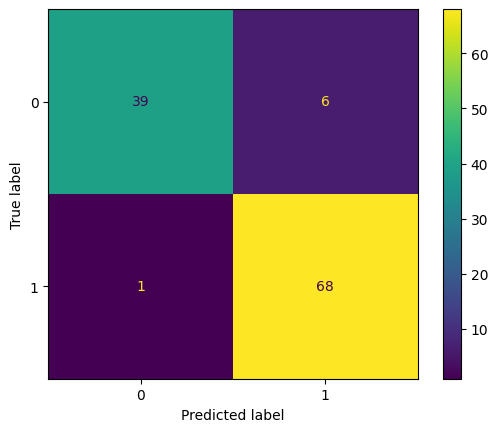

In [185]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import SGDClassifier


clf = SGDClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test) 

cm = confusion_matrix(y_test, y_pred)
print(f'CM: {cm}')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=clf.classes_)
disp.plot()

In [189]:
from sklearn.metrics import accuracy_score

print(f'Normalized: {accuracy_score(y_test, y_pred, normalize=True)}')

print(f'Unnormalized: {accuracy_score(y_test, y_pred, normalize=False)}')


Normalized: 0.9385964912280702
Unnormalized: 107.0


In [190]:
from sklearn.metrics import recall_score, precision_score, f1_score

print(f'Precision:{precision_score(y_test, y_pred)}')
print(f'Recall:{recall_score(y_test, y_pred)}')
print(f'F1:{f1_score(y_test, y_pred)}')


Precision:0.918918918918919
Recall:0.9855072463768116
F1:0.951048951048951


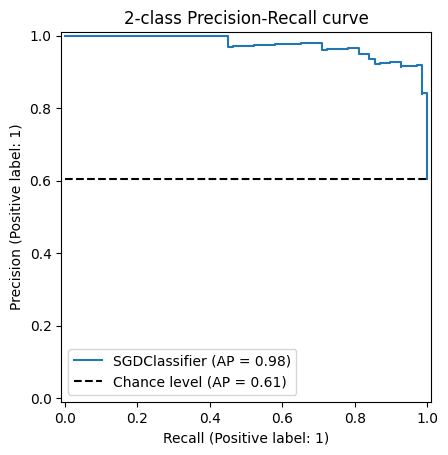

In [191]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    clf, X_test, y_test, name="SGDClassifier", plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

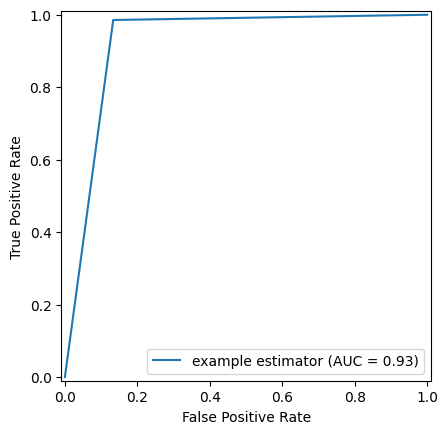

In [193]:
from sklearn.metrics import roc_curve, RocCurveDisplay, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='example estimator')

display.plot()

